In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [3]:
apps = pd.read_csv('googleplaystore.csv')
app_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

apps_raw = apps.copy()
app_reviews_raw = app_reviews.copy()

In [11]:
apps_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [121]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10341 non-null  object 
 1   category        10341 non-null  object 
 2   rating          10341 non-null  float64
 3   reviews         10341 non-null  object 
 4   size            10341 non-null  object 
 5   installs        10341 non-null  float64
 6   type            10341 non-null  object 
 7   price           10341 non-null  float64
 8   content_rating  10341 non-null  object 
 9   genres          10341 non-null  object 
 10  num_size        8817 non-null   float64
dtypes: float64(4), object(7)
memory usage: 1.3+ MB


In [107]:
app_reviews_raw.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [18]:
## Reset the data with raw
apps = apps_raw.copy()
apps.columns = apps.columns.str.strip().str.lower().str.replace(' ','_')
apps.fillna(value={'rating': apps.rating.mean()}, inplace=True)
apps.dropna(inplace=True)
apps=apps.drop_duplicates()
apps.drop(['last_updated', 'current_ver', 'android_ver'], axis=1, inplace=True)
apps.content_rating.replace("Adults only 18+", np.nan, inplace=True)
apps.content_rating.replace("Unrated", np.nan, inplace=True)
apps.dropna(inplace=True)
apps['num_size'] = apps['size']
apps.num_size.replace('Varies with device', np.nan, inplace = True )
apps.num_size=apps.num_size.str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    apps.num_size.str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)
apps['installs']=apps['installs'].str.replace(r'\D','').astype(float)
apps['price']=apps['price'].str.replace('$','').astype(float)
apps['reviews']=apps['reviews'].astype(float)

In [147]:
apps['reviews']=apps['reviews'].astype(float)

In [5]:
apps.loc[apps['size'] == 'Varies with device']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,num_size
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,NaN
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,NaN
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,NaN
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,NaN
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,NaN
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,NaN
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,NaN
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,NaN


In [122]:
apps.isnull().sum()/len(apps)

app               0.000000
category          0.000000
rating            0.000000
reviews           0.000000
size              0.000000
installs          0.000000
type              0.000000
price             0.000000
content_rating    0.000000
genres            0.000000
num_size          0.147375
dtype: float64

In [17]:
# Change names to snake_case for dot notation
apps.columns = apps.columns.str.strip().str.lower().str.replace(' ','_')

In [18]:
apps.rating.mean()

4.193338315362448

In [20]:
apps.fillna(value={'rating': apps.rating.mean()}, inplace=True)

In [23]:
apps.dropna(inplace=True)

In [24]:
apps.isnull().sum()/len(apps)

app               0.0
category          0.0
rating            0.0
reviews           0.0
size              0.0
installs          0.0
type              0.0
price             0.0
content_rating    0.0
genres            0.0
last_updated      0.0
current_ver       0.0
android_ver       0.0
dtype: float64

In [44]:
# Drop duplicated
apps[apps.duplicated()].count()

app               483
category          483
rating            483
reviews           483
size              483
installs          483
type              483
price             483
content_rating    483
genres            483
last_updated      483
current_ver       483
android_ver       483
dtype: int64

In [45]:
apps=apps.drop_duplicates()

In [47]:
apps[apps.duplicated()].count()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
genres            0
last_updated      0
current_ver       0
android_ver       0
dtype: int64

In [51]:
# Drop unused columns
apps.drop(['last_updated', 'current_ver', 'android_ver'], axis=1, inplace=True)

In [58]:
apps.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [61]:
apps.content_rating.value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: content_rating, dtype: int64

In [62]:
apps.content_rating.replace("Adults only 18+", np.nan, inplace=True)
apps.content_rating.replace("Unrated", np.nan, inplace=True)
apps.dropna(inplace=True)

In [91]:
apps['num_size'] = apps['size']

In [94]:
apps.num_size.replace('Varies with device', np.nan, inplace = True )

AttributeError: 'numpy.int32' object has no attribute 'replace'

In [95]:
apps.num_size=apps.num_size.str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    apps.num_size.str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)

AttributeError: 'numpy.int32' object has no attribute 'str'

In [106]:
apps.size.mean()

113751.0

In [7]:
apps.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,num_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2800.0


In [9]:
apps['installs']=apps['installs'].str.replace(r'\D','').astype(float)

In [11]:
apps['price']=apps['price'].str.replace('$','').astype(float)

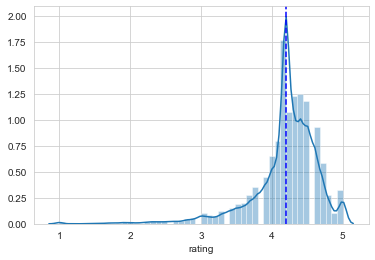

In [7]:
sns.distplot(apps.rating)
plt.axvline(np.median(apps.rating),color='b', linestyle='--')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183C8943908>,
      dtype=object)

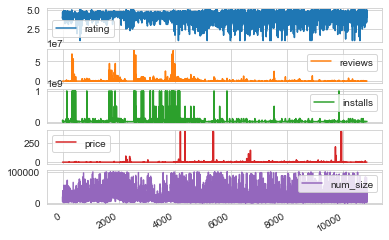

In [17]:
apps.plot.line(subplots=True)

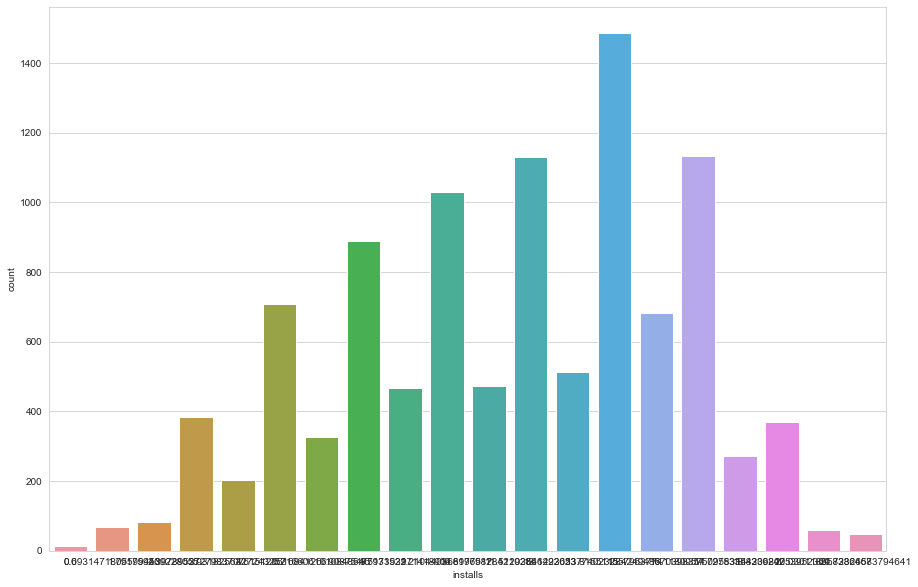

In [60]:
## 
plt.figure(figsize=(15,10))
sns.countplot(np.log1p(apps.installs))

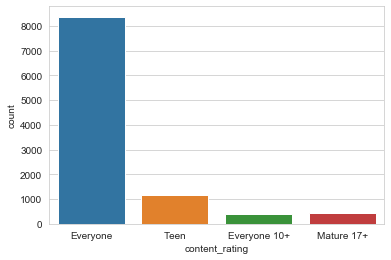

In [64]:
sns.countplot(apps.content_rating)

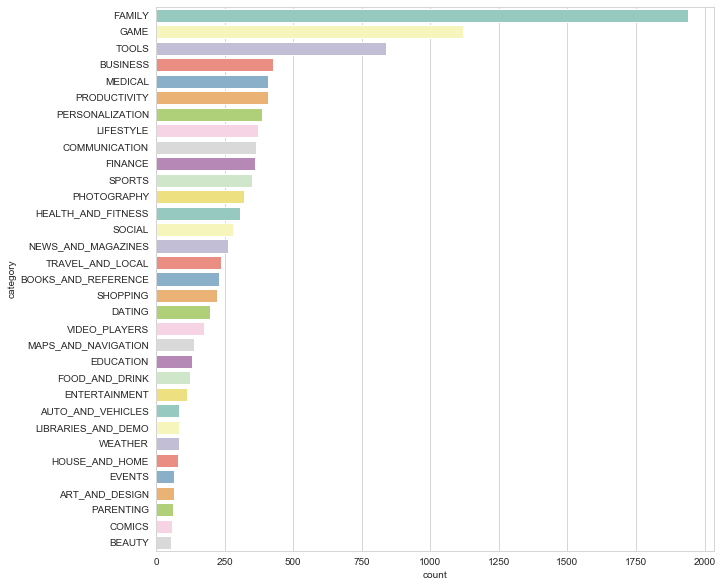

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(y="category", data=apps, palette="Set3", order = apps['category'].value_counts().index)

## Bivariado

In [78]:
apps.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,num_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0


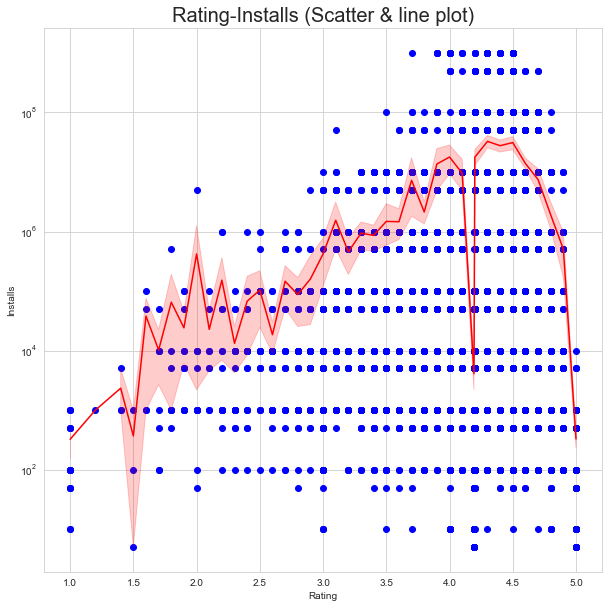

In [99]:
plt.figure(figsize=(10,10))
plt.scatter( x=apps.rating, y=apps.installs , color = 'blue')
g = sns.lineplot(x=apps.rating, y=apps.installs,color="red", data=apps) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating-Installs (Scatter & line plot)',size = 20)
plt.show()

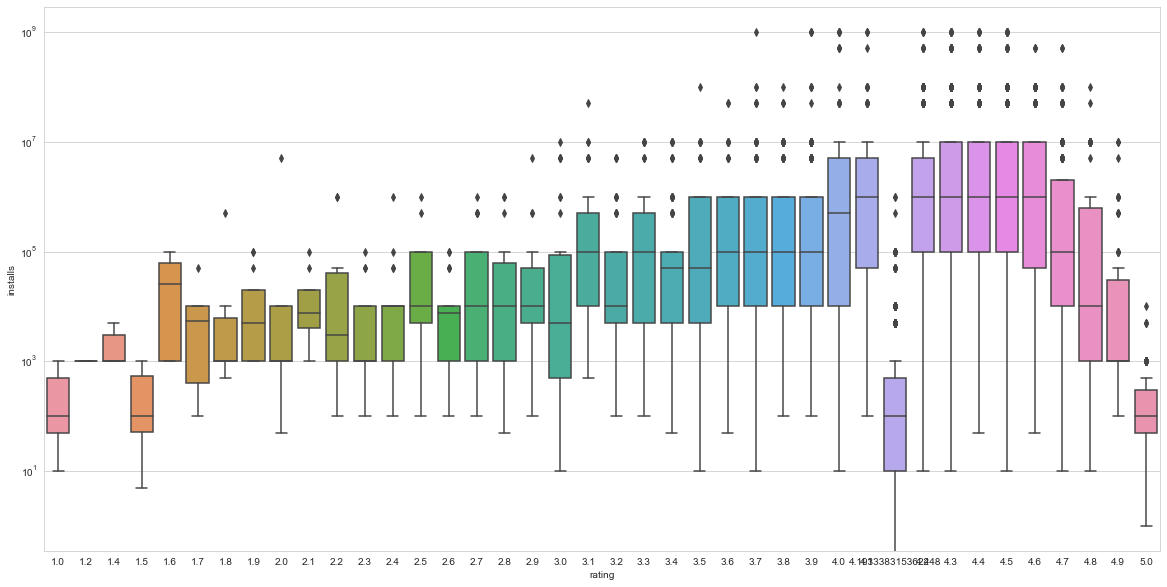

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x=apps.rating, y=apps.installs)
plt.yscale('log')

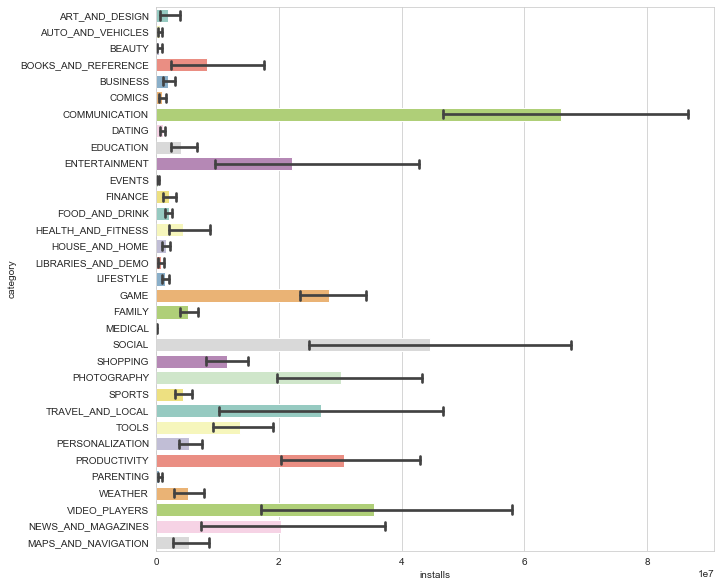

In [140]:
plt.figure(figsize=(10,10))
sns.barplot(x=apps.installs, y=apps.category, palette="Set3", capsize=.5)

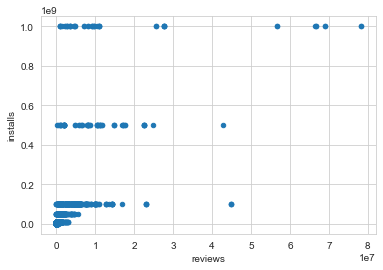

In [150]:
apps.plot.scatter(x="reviews", y="installs")

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

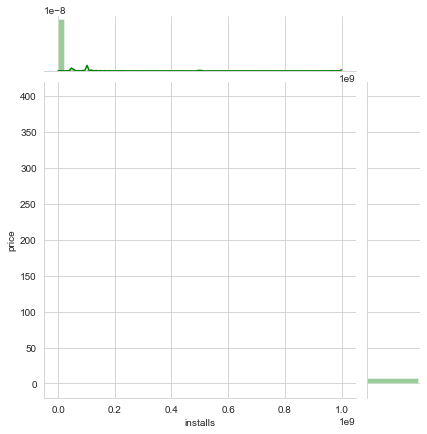

In [19]:
sns.jointplot(data=apps, x='installs', y='price', kind='reg', color='g')
plt.show()

In [166]:
apps.installs.unique().shape

(20,)

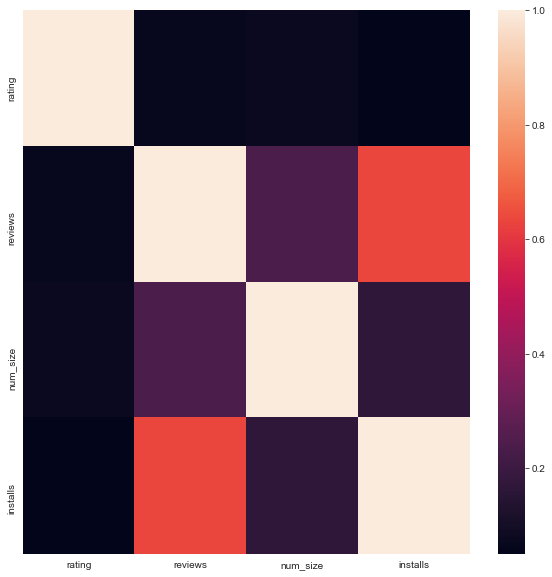

In [149]:
plt.figure(figsize=(10,10))
df = apps[['rating', 'reviews', 'installs']]
df.isnull().sum()
sns.heatmap(apps[['rating', 'reviews', 'num_size', 'installs']].astype('float').corr())

In [20]:
apps.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,num_size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2800.0


KeyboardInterrupt: 

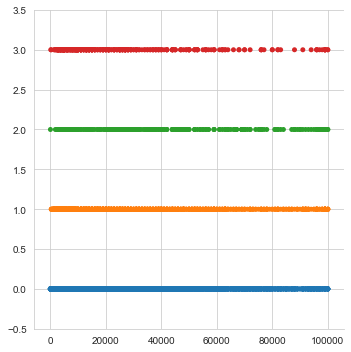

In [93]:
sns.catplot(x="num_size", y="content_rating", hue="type", kind="swarnm", data=apps)
#sns.stripplot(x='installs', y='content_rating', data=apps, alpha=0.3,jitter=0.2,color='r');
#plt.xscale('log')